In [1]:
import keras
from keras.layers import LSTM
import numpy as np

Using TensorFlow backend.


In [2]:
import data_loader as dl

In [3]:
data = dl.DataLoader()

In [4]:
X, Y, m = data.load()

In [5]:
from keras.preprocessing.sequence import pad_sequences

In [6]:
X_pad = pad_sequences(X, maxlen=m, padding='post')
Y_pad = pad_sequences(Y, maxlen=m, padding='post')

In [7]:
sample_weights = np.ones((273, m))
for i in xrange(273):
    for j in xrange(m):
        if (X_pad[i][j] == np.zeros(12)).all():
            sample_weights[i][j] = 0

In [8]:
from keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
from keras.layers import Dense
from keras.layers import Masking
from keras.layers import Dropout
from keras.layers.wrappers import TimeDistributed

In [11]:
from keras.layers import Embedding

In [12]:
mask = np.zeros(12)
model.add(Masking(mask_value=mask, input_shape=(m, 12)))
model.add(LSTM(100, return_sequences=True, dropout_W=0.1, dropout_U=0.1))
model.add(LSTM(100, return_sequences=True, dropout_W=0.1, dropout_U=0.1))
model.add(LSTM(100, return_sequences=True, dropout_W=0.1, dropout_U=0.1))
model.add(TimeDistributed(Dense(12, activation="softmax")))

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              sample_weight_mode='temporal')

In [15]:
X_train, X_test = X_pad[:136, :], X_pad[136:, :]

In [16]:
Y_train, Y_test = Y_pad[:136, :], Y_pad[136:, :]

In [17]:
sample_weights_train, sample_weights_test = sample_weights[:136, :], sample_weights[136:, :]

In [18]:
# # for custom metrics
import numpy as K

# def weighted_accuracy(y_true, y_pred):
#     score_array *= sample_weights
# score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))

def weighted_accuracy(y_true, y_pred):
    # Only for testing
#     score_array = K.equal(K.argmax(y_true, axis=-1),
#                           K.argmax(y_pred, axis=-1))
#     score_array *= weights
#     score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))
#     return K.mean(score_array)
    total = 0.0
    count = 0.0
    for i, y_i in enumerate(y_true):
        for j, y_ij in enumerate(y_i):
            if sum(y_ij) > 0:
                total += y_ij[y_pred[i][j]]
                count += 1
    return total / count
    

In [19]:
model.fit(X_train, Y_train, batch_size=136, nb_epoch=100, sample_weight=sample_weights_train)

Epoch 1/100
136/136 [==============================] - 204s - loss: 31.4744
Epoch 2/100
136/136 [==============================] - 198s - loss: 27.6368
Epoch 3/100
136/136 [==============================] - 255s - loss: 26.7950
Epoch 4/100
136/136 [==============================] - 205s - loss: 26.8056
Epoch 5/100
136/136 [==============================] - 192s - loss: 26.3941
Epoch 6/100
136/136 [==============================] - 194s - loss: 26.2791
Epoch 7/100
136/136 [==============================] - 195s - loss: 26.2158
Epoch 8/100
136/136 [==============================] - 213s - loss: 26.1559
Epoch 9/100
136/136 [==============================] - 193s - loss: 26.1848
Epoch 10/100
136/136 [==============================] - 192s - loss: 26.1006
Epoch 11/100
136/136 [==============================] - 192s - loss: 26.0700
Epoch 12/100
136/136 [==============================] - 188s - loss: 26.1503
Epoch 13/100
136/136 [==============================] - 191s - loss: 26.1225
Epoch 14

In [20]:
Y_prediction = model.predict_classes(X_test, batch_size=5)

137/137 [==============================] - 193s   


In [21]:
# Y_prediction = to_categorical(Y_prediction)
# weighted_accuracy(Y_test, Y_prediction, sample_weights_test)
weighted_accuracy(Y_test, Y_prediction)

0.41310074639467731

In [22]:
model.evaluate(X_test, Y_test, batch_size=137, sample_weight=sample_weights_test)

137/137 [==============================] - 37s


21.618268966674805

In [23]:
Y_prediction[0]

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
Y_prediction.shape

(137, 4954)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
len(model.get_weights())

38

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


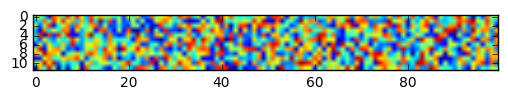

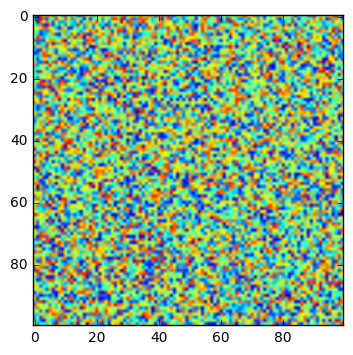

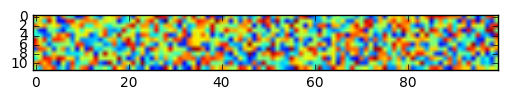

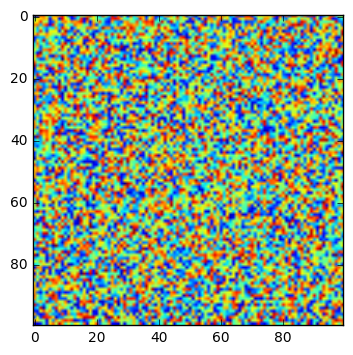

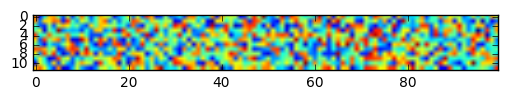

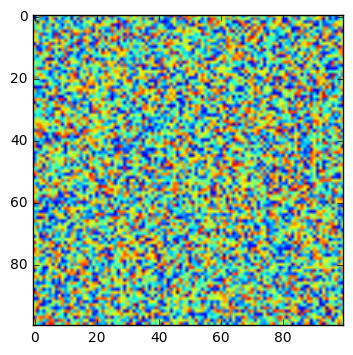

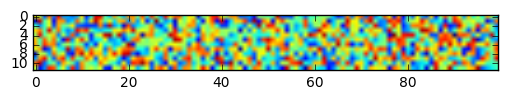

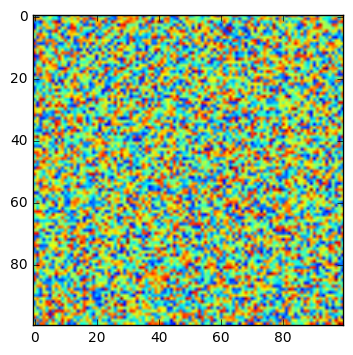

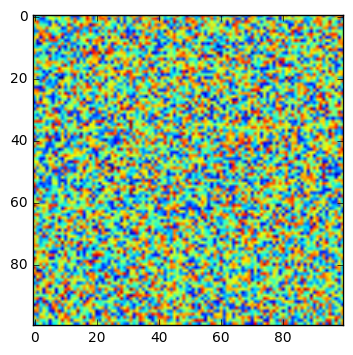

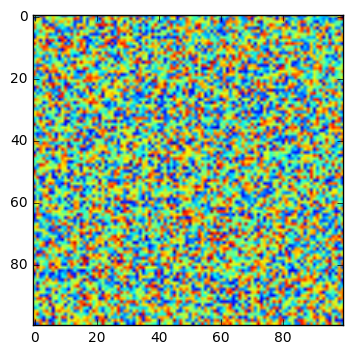

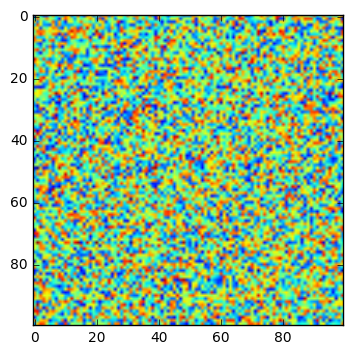

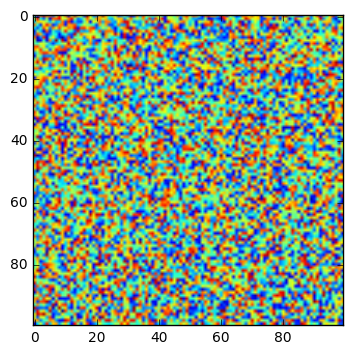

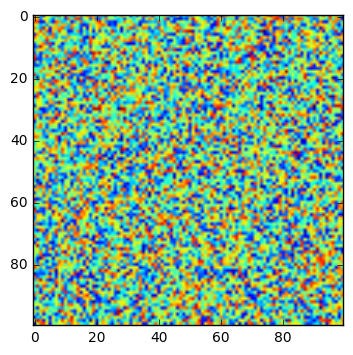

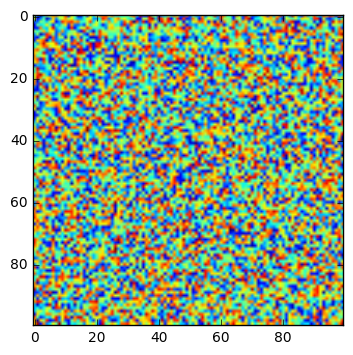

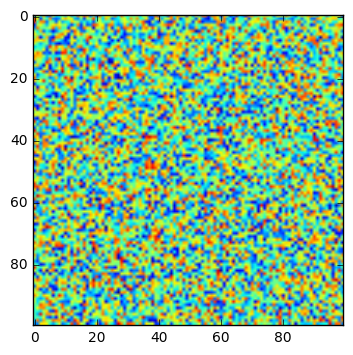

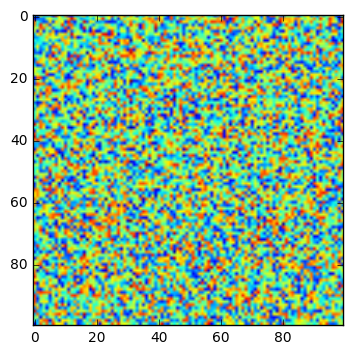

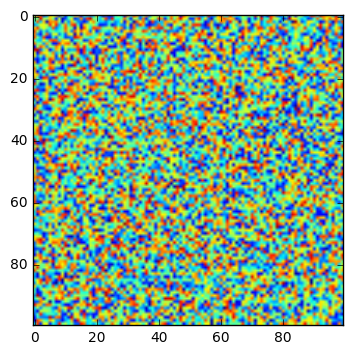

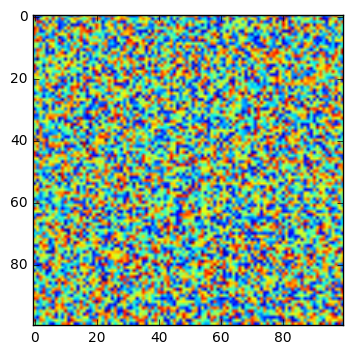

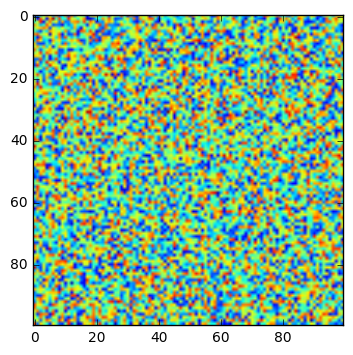

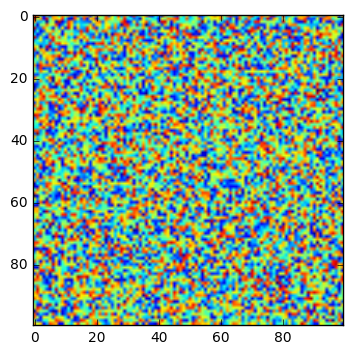

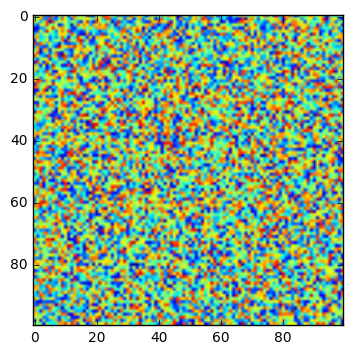

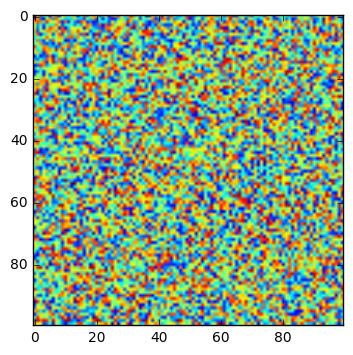

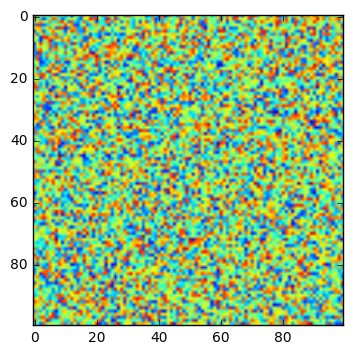

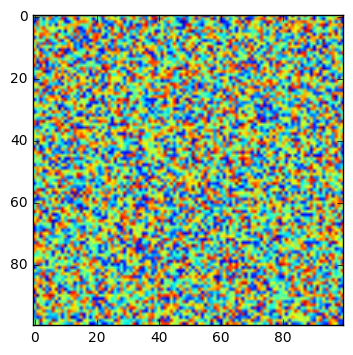

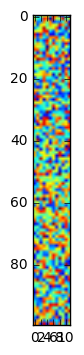

In [27]:
for w in model.get_weights():
    if len(w.shape) > 1:
        plt.figure()
        plt.imshow(w)

In [28]:
count = 0
for y in Y_prediction:
    if sum(y) > 0:
        count += 1
        print sum(y)
print count

48
172
8250
8610
802
74
489
548
20
374
416
50
9760
120
100
22
9244
22
39
22
9218
242
122
70
25
448
126
35
112
34
412
126
9610
68
35
94
122
62
9814
118
140
275
47
188
66
740
568
50
25
130
166
5
86
98
98
10
305
250
104
78
30
172
9571
157
116
10
9292
208
5
130
32
9394
126
20
32
35
130
110
8990
141
183
91
150
417
162
143
8270
167
206
9570
58
180
23
63
192
1
206
263
187
172
120
12
42
82
45
326
9408
138
49
59
32
30
94
211
113
14
9488
12
62
119


array([0, 0, 0, ..., 0, 0, 0])